# Diagnostic Plots for MICE

This notebook provides a comprehensive guide to all plotting capabilities available for MICE diagnostics and visualization.

## Overview

Visual diagnostics are essential for assessing imputation quality. This notebook covers:

1. Missing data pattern visualization
2. Convergence diagnostics
3. Distribution comparison plots (stripplot, boxplot, density)
4. Relationship plots (scatter plots)
5. Customization options and saving plots


## 1. Import Libraries and Prepare Data


In [37]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

from imputation.MICE import MICE
from plotting.utils import md_pattern_like, plot_missing_data_pattern
from plotting.diagnostics import (
    stripplot, bwplot, densityplot, densityplot_split,
    xyplot, plot_chain_stats
)

# Load NHANES dataset
df = pd.read_csv('data/nhanes.csv')
print("Dataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (25, 4)

Missing values:
age     0
bmi     9
hyp     8
chl    10
dtype: int64


## 2. Missing Data Pattern Visualization

Before imputation, visualize the missing data pattern to understand the structure of missingness.


### 2.1 Tabular Missing Data Pattern


In [38]:
# Generate missing data pattern table
pattern_df = md_pattern_like(df)
print("Missing Data Pattern:")
print(pattern_df)
print("\nInterpretation:")
print("- Rows show different missingness patterns")
print("- '#rows' shows how many observations have that pattern")
print("- 1 = observed, 0 = missing")
print("- '#miss_row' shows number of missing values per pattern")
print("- '#miss_col' shows number of missing values per variable")


Missing Data Pattern:
           age  hyp  bmi  chl  #miss_row
#rows                                   
13           1    1    1    1          0
3            1    1    1    0          1
1            1    1    0    1          1
1            1    0    0    1          2
7            1    0    0    0          3
#miss_col    0    8    9   10         27

Interpretation:
- Rows show different missingness patterns
- '#rows' shows how many observations have that pattern
- 1 = observed, 0 = missing
- '#miss_row' shows number of missing values per pattern
- '#miss_col' shows number of missing values per variable


### 2.2 Visual Missing Data Pattern


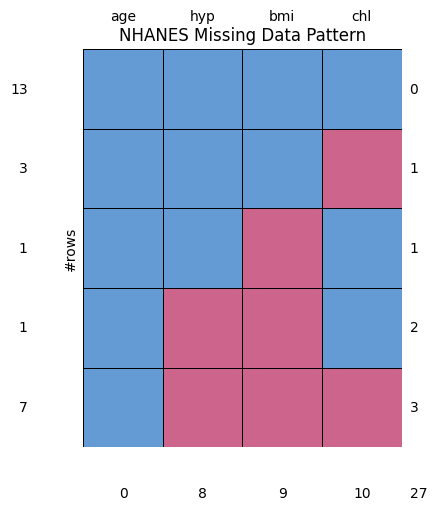


Blue = observed, Pink = missing


In [39]:
# Visualize missing data pattern
plot_missing_data_pattern(pattern_df, title="NHANES Missing Data Pattern")
print("\nBlue = observed, Pink = missing")


## 3. Perform Imputation

Let's impute the data so we can create diagnostic plots.


In [55]:
# Perform imputation
mice = MICE(df)
mice.impute(n_imputations=5, maxit=10, method='pmm')

# Prepare missing pattern for plotting functions
# Format: 1 = observed, 0 = missing
missing_pattern = df.notna().astype(int)

print(f"Created {len(mice.imputed_datasets)} imputed datasets")


Created 5 imputed datasets


## 4. Convergence Diagnostics

Check whether the imputation algorithm has converged by examining chain statistics.


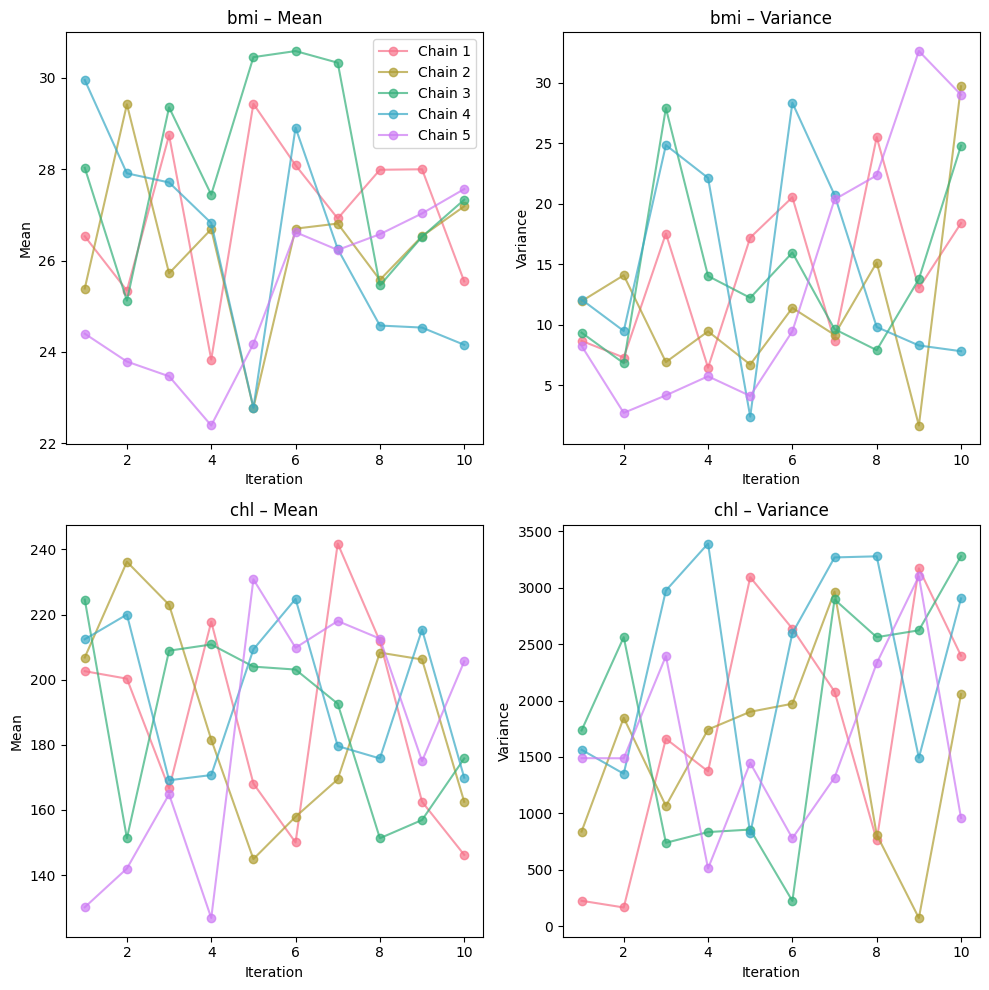

What to look for:
- No systematic trends up or down
- More or less similar behavior across all chains


In [57]:
# Plot chain statistics
numeric_cols = ['bmi', 'chl']  # Only numeric columns with missing values
plot_chain_stats(mice.chain_mean, mice.chain_var, columns=numeric_cols)

print("What to look for:")
print("- No systematic trends up or down")
print("- More or less similar behavior across all chains")


## 5. Distribution Comparison: Strip Plots

Strip plots show individual imputed values compared to observed values.


### 5.1 Strip Plot - All Variables, Separate Imputations


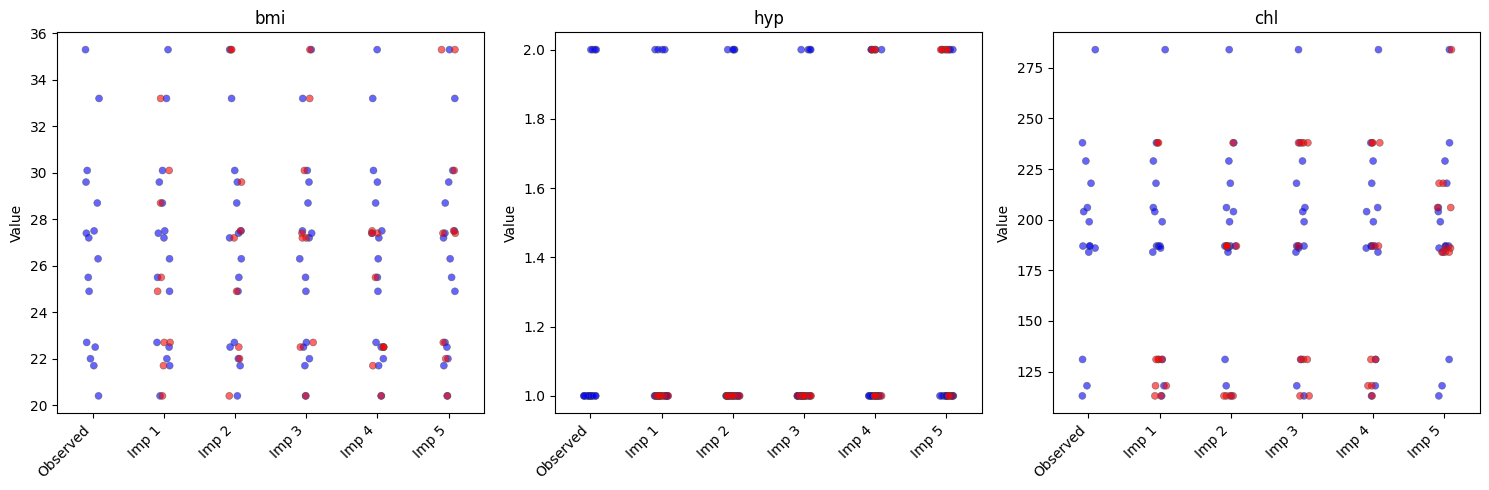

Blue = observed values, Red = imputed values
Each imputation is shown separately


In [58]:
# Strip plot for all variables with separate imputations
stripplot(mice.imputed_datasets, missing_pattern, merge_imputations=False)
print("Blue = observed values, Red = imputed values")
print("Each imputation is shown separately")


### 5.2 Strip Plot - Merged Imputations


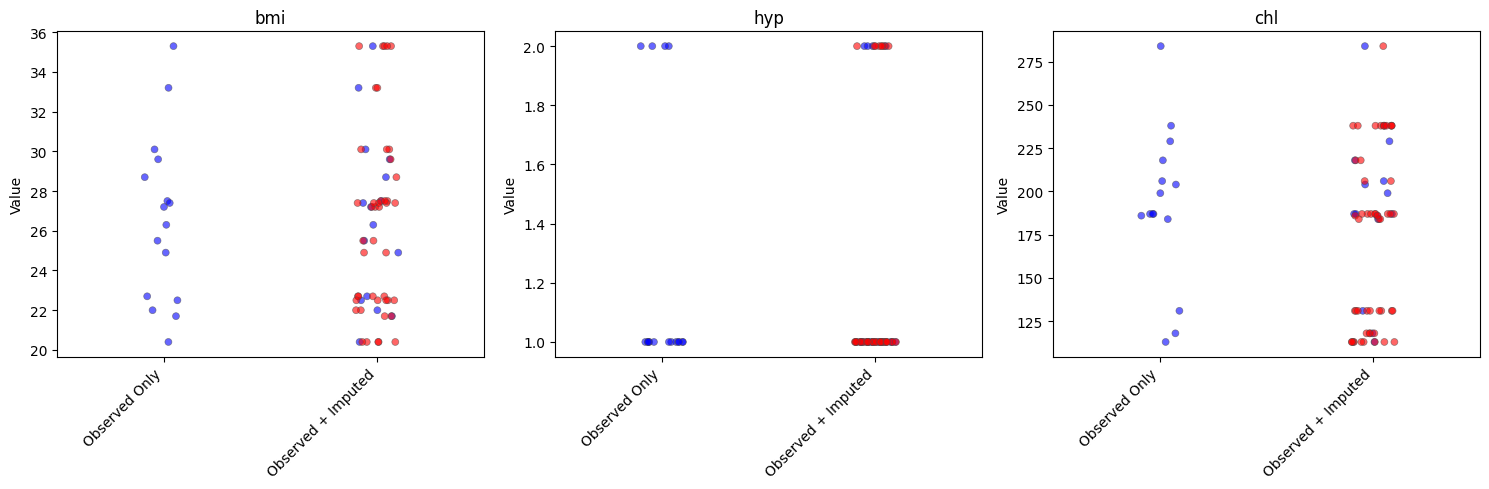

All imputations combined for easier comparison


In [59]:
# Strip plot with merged imputations
stripplot(mice.imputed_datasets, missing_pattern, merge_imputations=True)
print("All imputations combined for easier comparison")


### 5.3 Strip Plot - Specific Columns


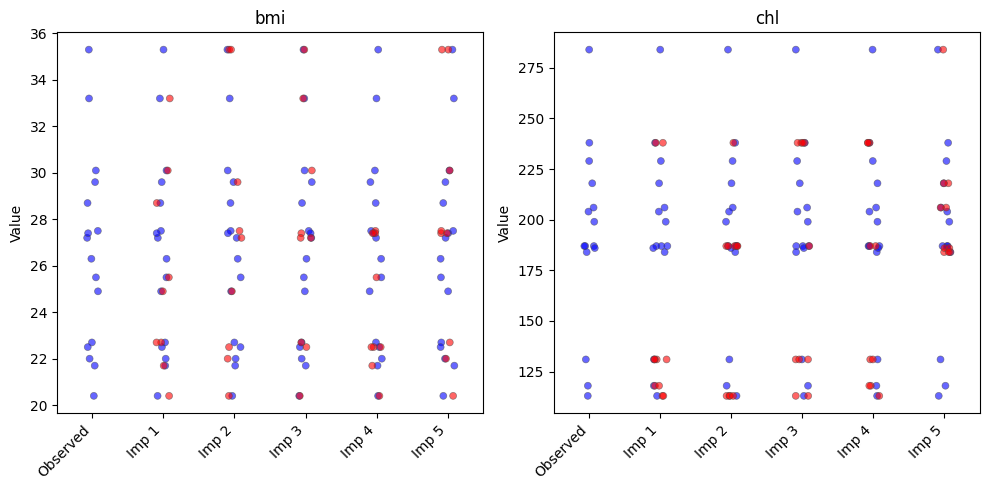

In [60]:
# Focus on specific columns
stripplot(mice.imputed_datasets, missing_pattern, columns=['bmi', 'chl'])


## 6. Distribution Comparison: Box-and-Whisker Plots

Box plots show the distribution of imputed values compared to observed values.


### 6.1 Box Plot - Separate Imputations


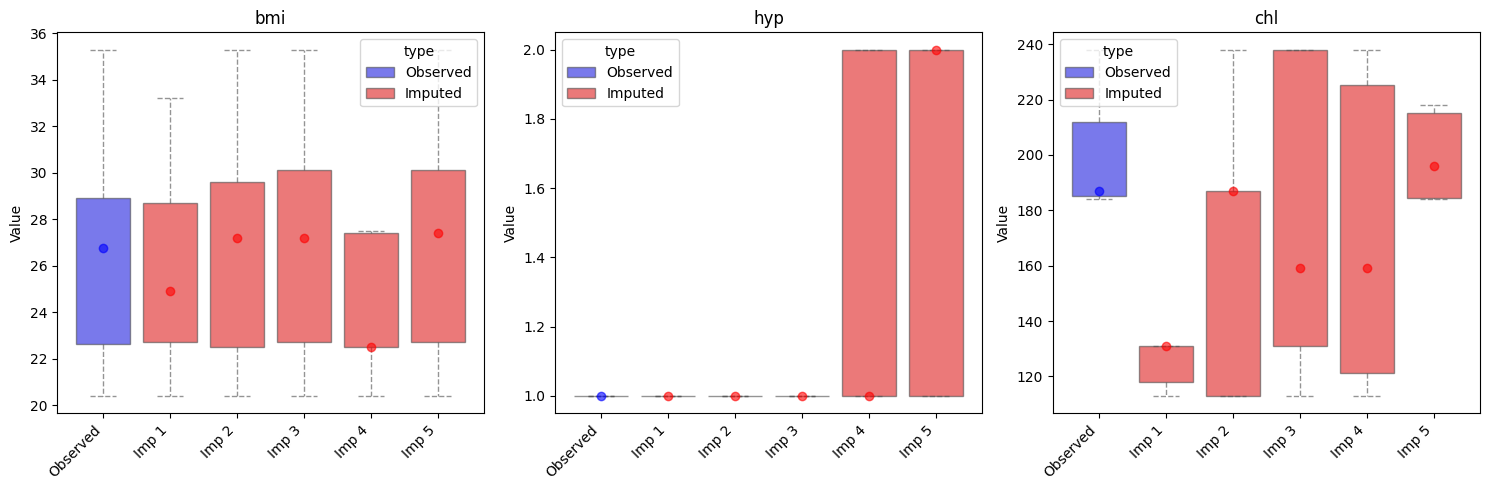

Compare distribution of imputed values to observed values


In [62]:
# Box plot with separate imputations
bwplot(mice.imputed_datasets, missing_pattern, merge_imputations=False)
print("Compare distribution of imputed values to observed values")


### 6.2 Box Plot - Merged Imputations


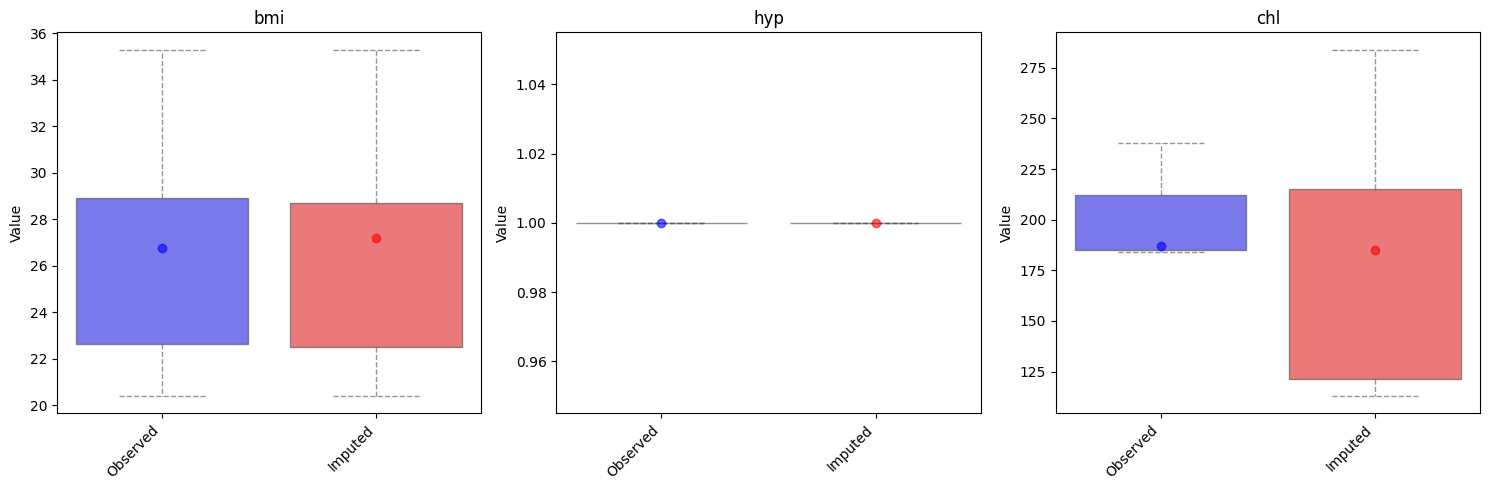

All imputations combined


In [63]:
# Box plot with merged imputations
bwplot(mice.imputed_datasets, missing_pattern, merge_imputations=True)
print("All imputations combined")


## 7. Distribution Comparison: Density Plots

Density plots (kernel density estimation) show the smoothed distribution.


### 7.1 Density Plot - Overlaid


/Users/zhannalopuliak/Documents/mice-py/examples/../plotting/diagnostics.py:384: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=imp_values, ax=ax, color=imputed_color, label=label, alpha=0.6)
/Users/zhannalopuliak/Documents/mice-py/examples/../plotting/diagnostics.py:384: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=imp_values, ax=ax, color=imputed_color, label=label, alpha=0.6)
/Users/zhannalopuliak/Documents/mice-py/examples/../plotting/diagnostics.py:384: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=imp_values, ax=ax, color=imputed_color, label=label, alpha=0.6)


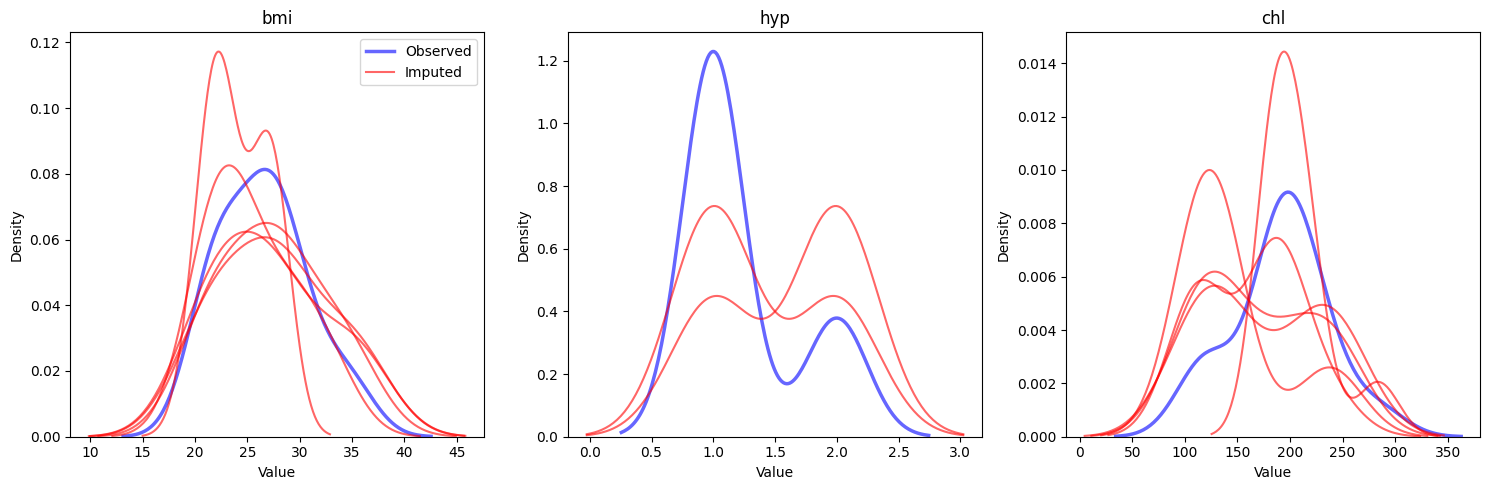

Blue = observed, Red = imputed
Ideally, distributions should be similar


In [64]:
# Density plot with overlaid distributions
densityplot(mice.imputed_datasets, missing_pattern)
print("Blue = observed, Red = imputed")
print("Ideally, distributions should be similar")


### 7.2 Density Plot - Separate Panels

For a more detailed view, plot each imputation separately.


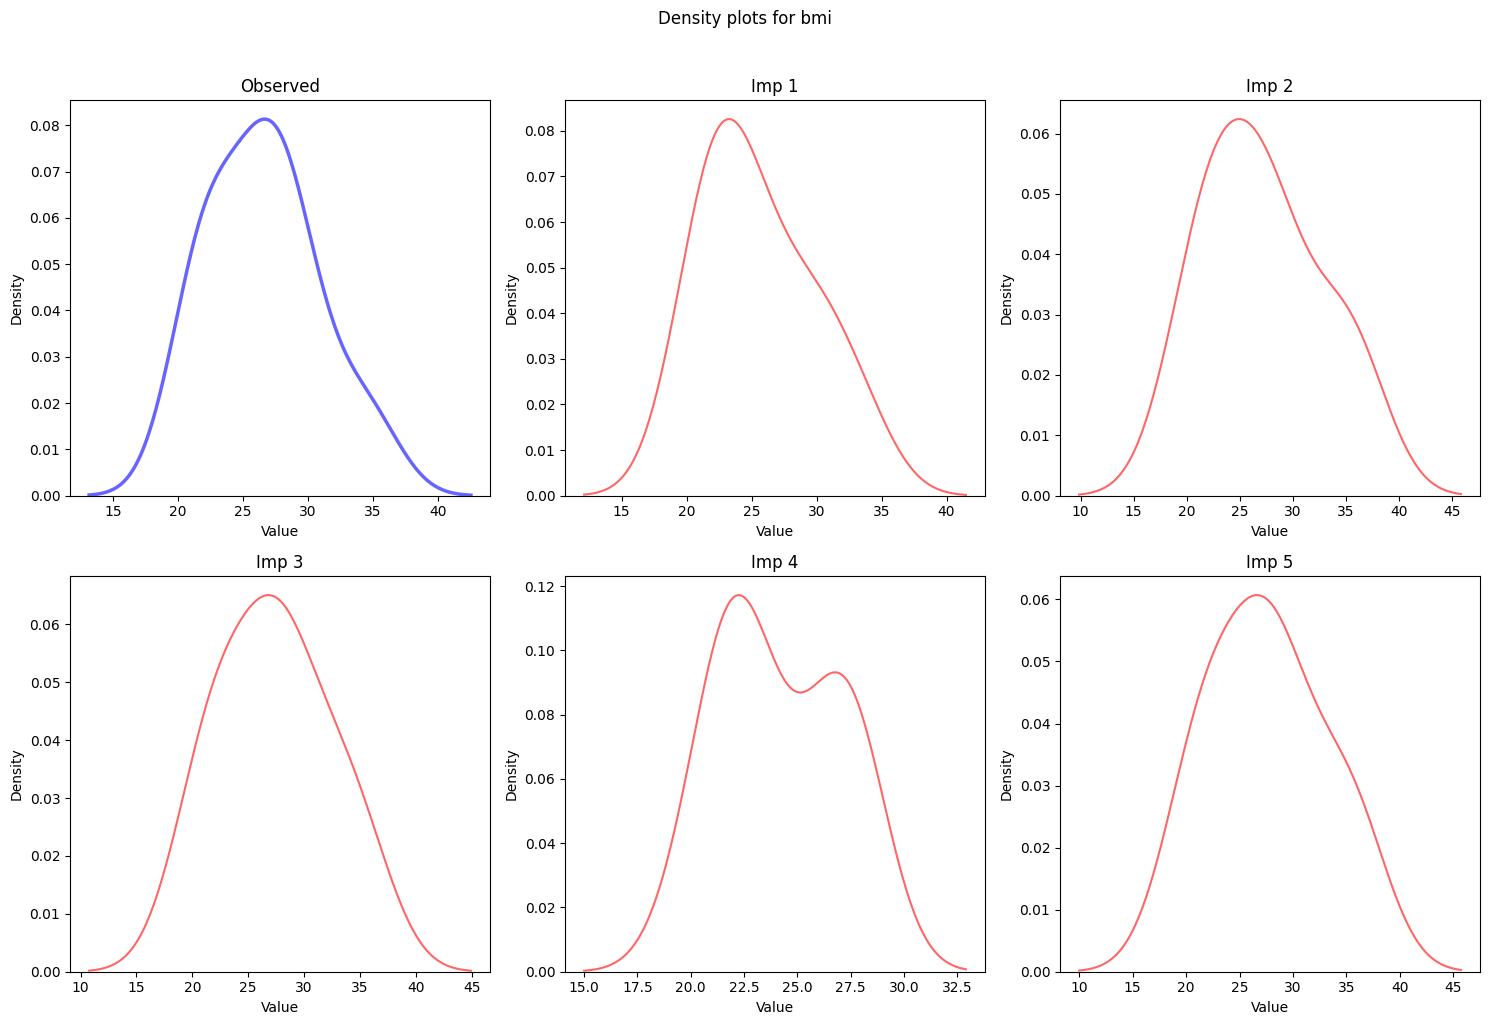

Each imputation shown separately for detailed inspection


In [65]:
# Density plot with separate panels for one variable
densityplot_split(mice.imputed_datasets, missing_pattern, column='bmi')
print("Each imputation shown separately for detailed inspection")


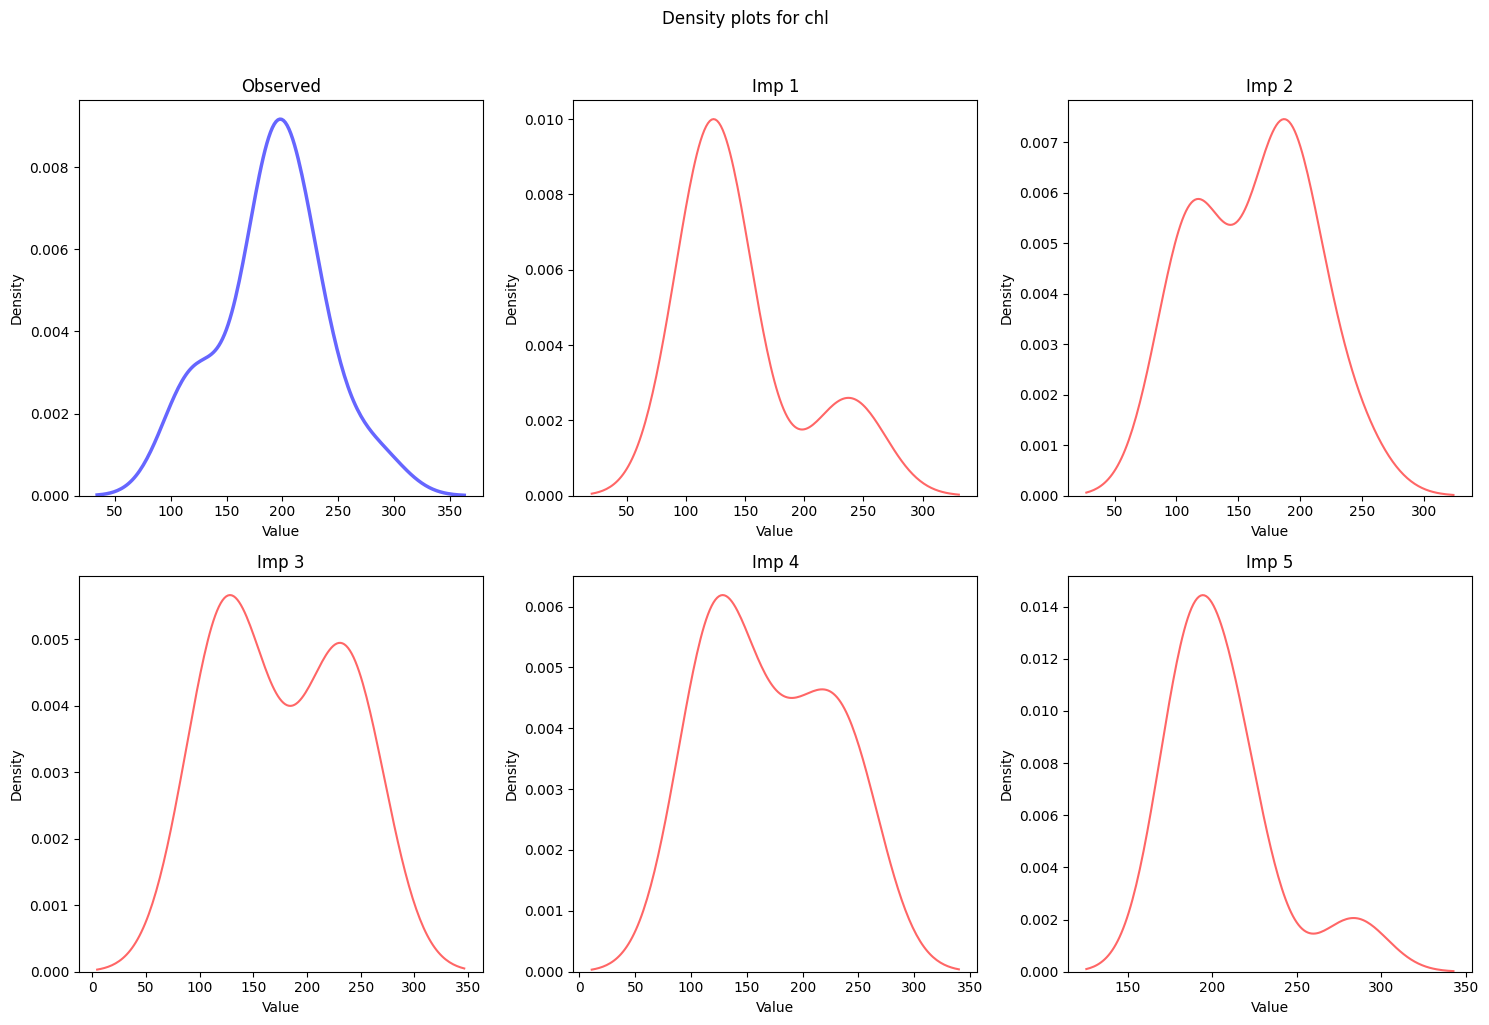

In [66]:
densityplot_split(mice.imputed_datasets, missing_pattern, column='chl')


## 8. Relationship Plots: Scatter Plots

Examine relationships between variables using scatter plots (xyplot).


### 8.1 Scatter Plot - Separate Imputations


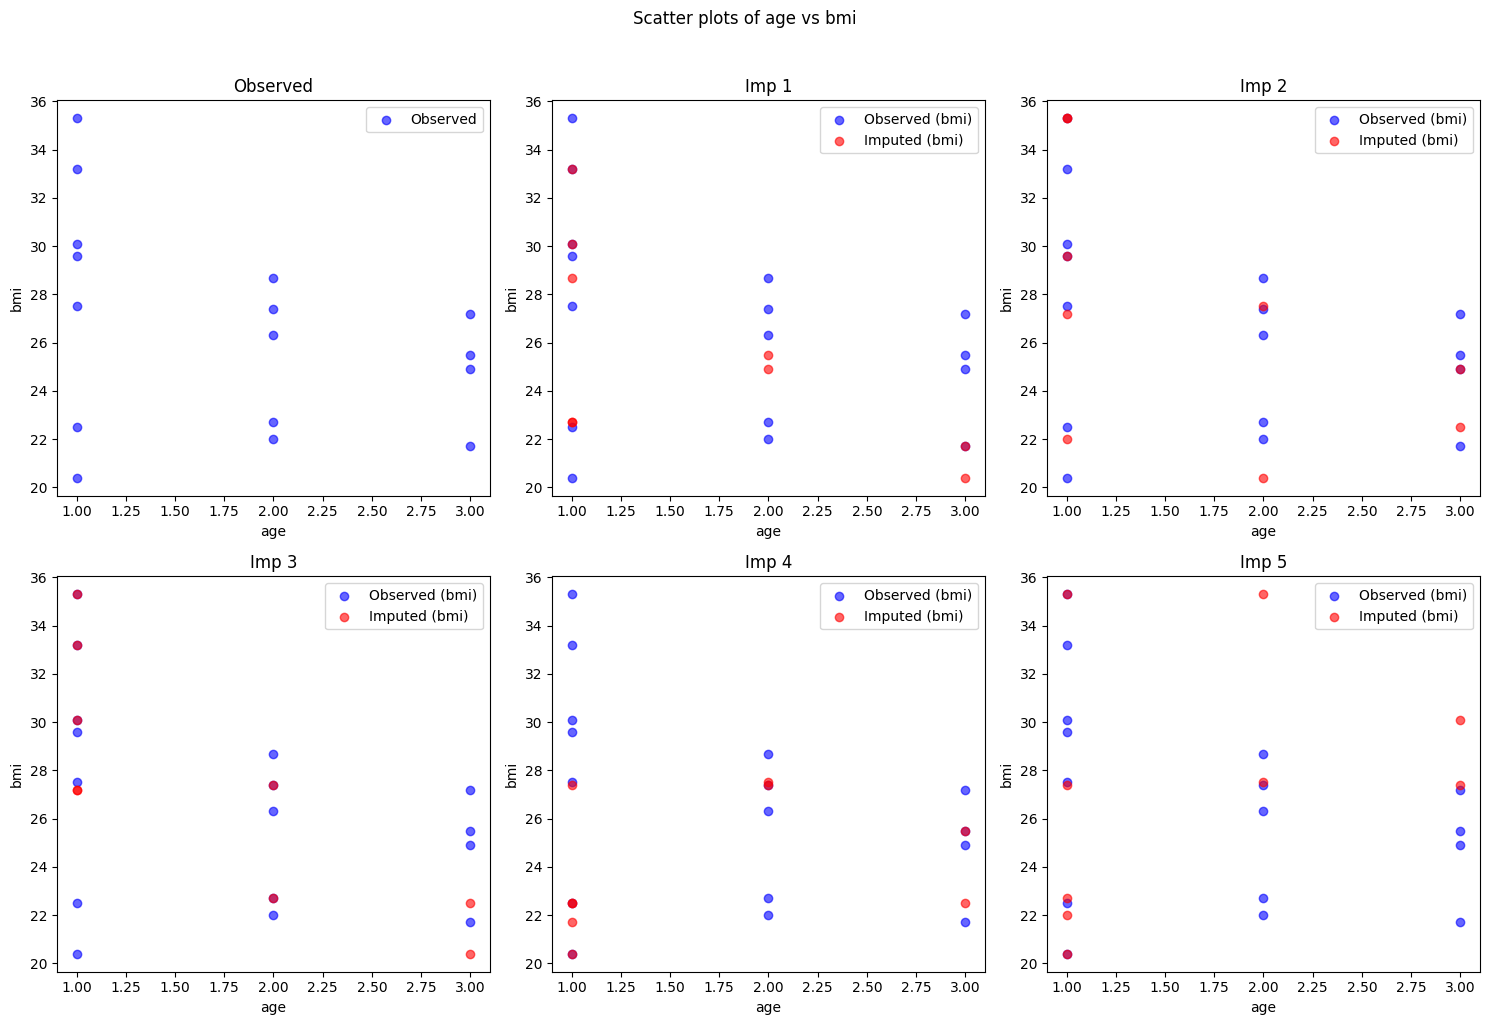

Red points show imputed values for the y-axis variable (bmi)


In [67]:
# Scatter plot: age vs bmi
xyplot(mice.imputed_datasets, missing_pattern, x='age', y='bmi', merge_imputations=False)
print("Red points show imputed values for the y-axis variable (bmi)")


### 8.2 Scatter Plot - Merged Imputations


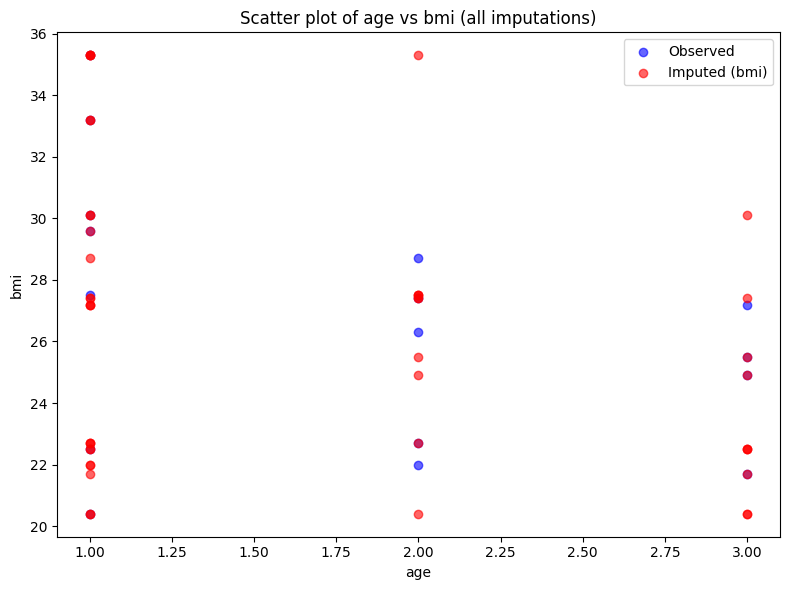

All imputations shown together


In [68]:
# Scatter plot with merged imputations
xyplot(mice.imputed_datasets, missing_pattern, x='age', y='bmi', merge_imputations=True)
print("All imputations shown together")


### 8.3 Another Scatter Plot Example


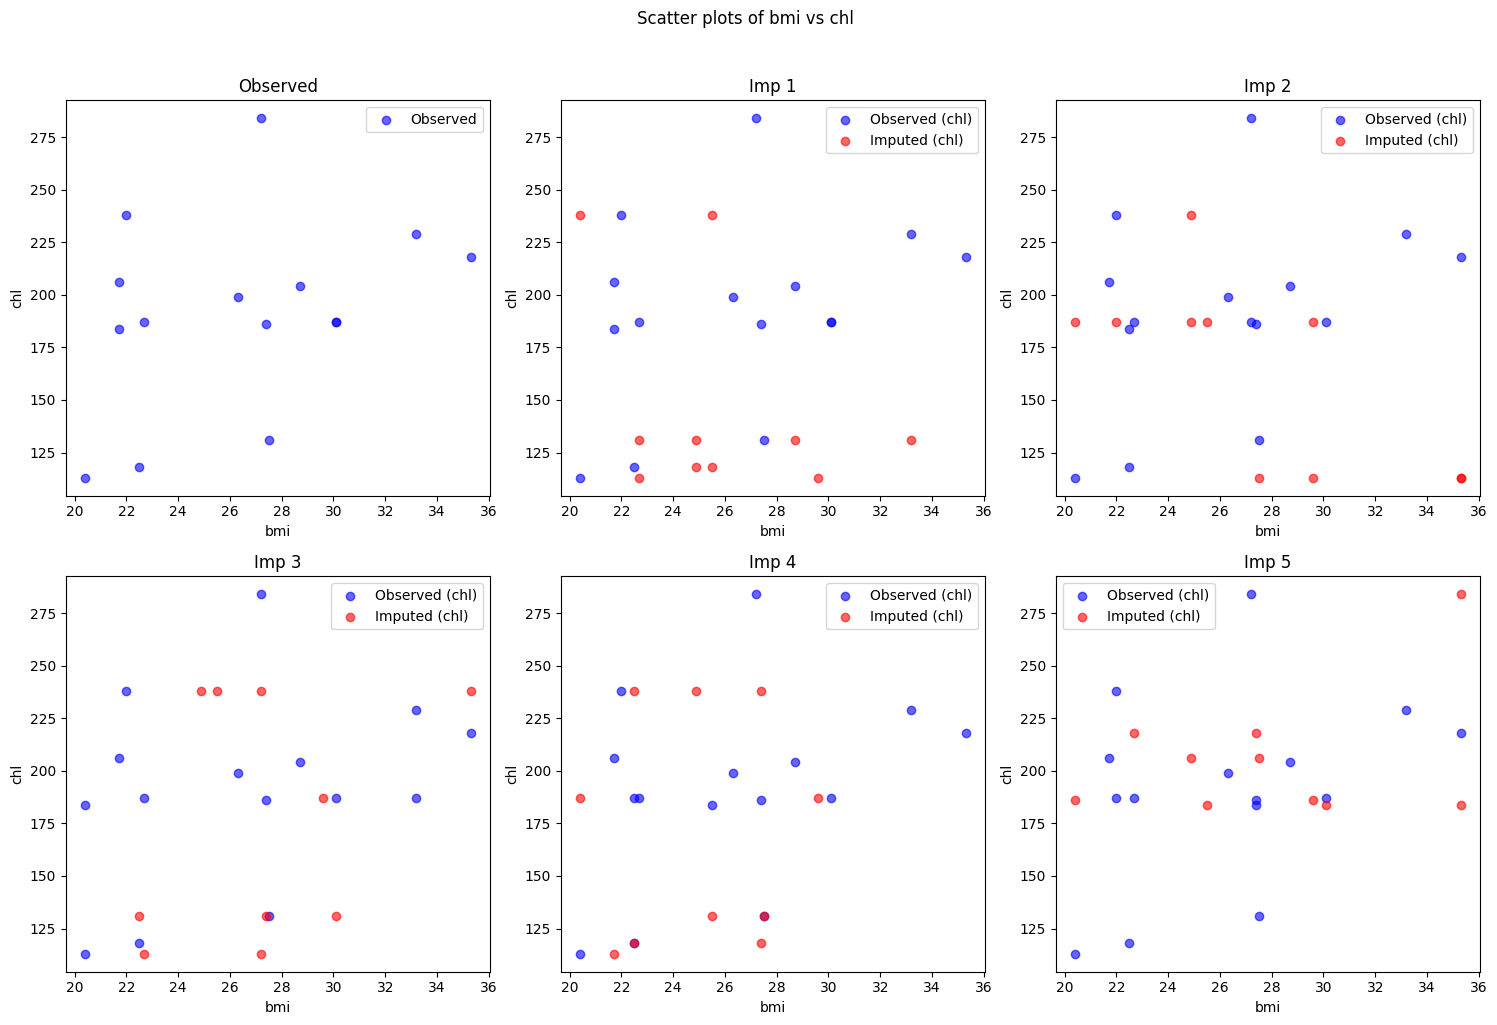

Examining relationship between two variables with missing values


In [69]:
# Scatter plot: bmi vs chl
xyplot(mice.imputed_datasets, missing_pattern, x='bmi', y='chl', merge_imputations=False)
print("Examining relationship between two variables with missing values")


## 9. Customization Options

All plotting functions support customization.


### 9.1 Custom Colors


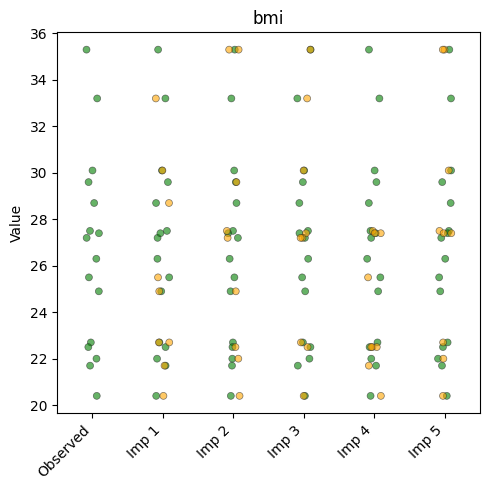

Custom colors: green for observed, orange for imputed


In [70]:
# Custom colors
stripplot(
    mice.imputed_datasets,
    missing_pattern,
    columns=['bmi'],
    observed_color='green',
    imputed_color='orange'
)
print("Custom colors: green for observed, orange for imputed")


### 9.2 Saving Plots to Files

Save plots for use in reports or publications.


In [71]:
# Save plots to files (uncomment to save)
stripplot(mice.imputed_datasets, missing_pattern, 
          columns=['bmi', 'chl'], 
          save_path='stripplot_bmi_chl.png')

densityplot(mice.imputed_datasets, missing_pattern,
           columns=['bmi'],
           save_path='densityplot_bmi.png')

xyplot(mice.imputed_datasets, missing_pattern,
       x='age', y='bmi',
       save_path='scatterplot_age_bmi.png')

print("Plots can be saved by providing save_path parameter")
print("Saved as high-resolution PNG files (300 DPI)")


Plots can be saved by providing save_path parameter
Saved as high-resolution PNG files (300 DPI)


## 10. Diagnostic Checklist

Use these plots to assess imputation quality:

### ✓ Missing Data Pattern
- **Goal**: Understand structure of missingness
- **Plot**: `plot_missing_data_pattern()`
- **Check**: Is missingness random or patterned?

### ✓ Convergence
- **Goal**: Ensure algorithm has converged
- **Plot**: `plot_chain_stats()`
- **Check**: Do chains stabilize and mix well?

### ✓ Distribution Matching
- **Goal**: Imputed values should have similar distribution to observed
- **Plots**: `stripplot()`, `bwplot()`, `densityplot()`
- **Check**: Are red (imputed) and blue (observed) distributions similar?

### ✓ Relationship Preservation
- **Goal**: Relationships between variables should be maintained
- **Plot**: `xyplot()`
- **Check**: Do imputed points follow the same pattern as observed?

### ✓ Plausibility
- **Goal**: Imputed values should be realistic
- **Plots**: All distribution plots
- **Check**: Are there any impossible or extreme imputed values?


## Summary

In this notebook, we covered all plotting capabilities:

**Missing Data Visualization**:
- `md_pattern_like()` - tabular pattern
- `plot_missing_data_pattern()` - visual heatmap

**Convergence Diagnostics**:
- `plot_chain_stats()` - trace plots of means and variances

**Distribution Comparison**:
- `stripplot()` - individual values comparison
- `bwplot()` - box-and-whisker plots
- `densityplot()` - kernel density overlays
- `densityplot_split()` - separate density plots per imputation

**Relationship Plots**:
- `xyplot()` - scatter plots for bivariate relationships

**Customization**:
- Custom colors with `observed_color` and `imputed_color`
- Column selection with `columns` parameter
- Merged vs separate imputations with `merge_imputations`
- Save to files with `save_path` parameter

**Best Practices**:
- Always check convergence before using imputed data
- Compare distributions visually - imputed should match observed
- Check relationships between variables are preserved
- Ensure imputed values are plausible

**Next steps**:
- Review earlier notebooks for imputation methods and parameters
- See `04_analysis_workflow.ipynb` for statistical inference with imputed data
